# Iterative methods for sparse matrices

We will focus on methods that make (ideally) steady gradual improvements to an approximate solution. 

## Jacobi and Gauss-Seidel

A classical iterative idea is to split the matrix additively: $A=M-N$, so that $Mx=Nx+b$. This is turned into a fixed-point iteration, $Mx^{(k+1)}=Nx^{(k)}+b$. If $M$ is the "diagonal part" of $A$, this is the **Jacobi** iteration, and if $M$ is the lower triangle of $A$, it's the **Gauss–Seidel** iteration.

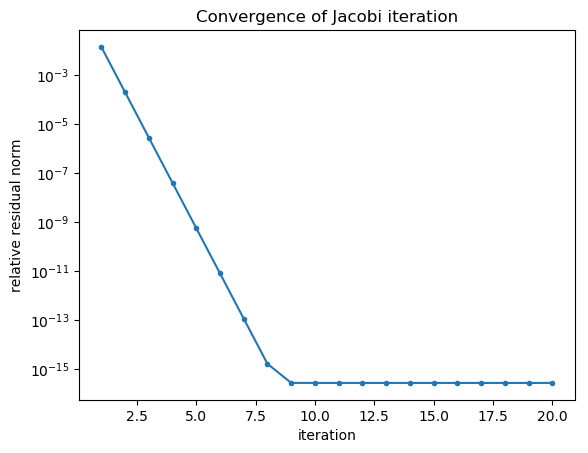

In [15]:
using LinearAlgebra, SparseArrays, PyPlot
m = 50000;
speye(m) = spdiagm(0=>ones(m))

function jacobi(A,b,kmax)
    m = size(A,1)
    dA = diag(A)  # vector of the diagonal values
    N = - triu(A,1) - tril(A,-1)
    x = zero(b)
    normres = zeros(kmax)
    for k = 1:kmax
        x = (N*x + b)./dA;
        normres[k] = norm(b-A*x)/norm(b)
    end
    return x,normres
end

A = sprandn(m,m,0.001) + m/100*speye(m)
b = ones(m)
x,normres = jacobi(A,b,20)
semilogy(1:20,normres,".-");
xlabel("iteration"); ylabel("relative residual norm");
title("Convergence of Jacobi iteration");

Iterative methods come at a price: the convergence of the method depends very strongly on the matrix $A$, as well as the method chosen. Unlike LU factorization and the related direct methods, these methods are far from "plug-and-play." 

It's easy to show that if $Ax=b$ and we iterate using $A=M-N$ as above, the errors satisfy $M(x^{(k)}-x)=N(x^{(k-1)}-x)$. So the error vector is repeatedly hit with $M^{-1}N$. If that matrix has spectral radius $\rho$, then $\rho<1$ implies linear convergence, but $\rho>1$ implies divergence. 

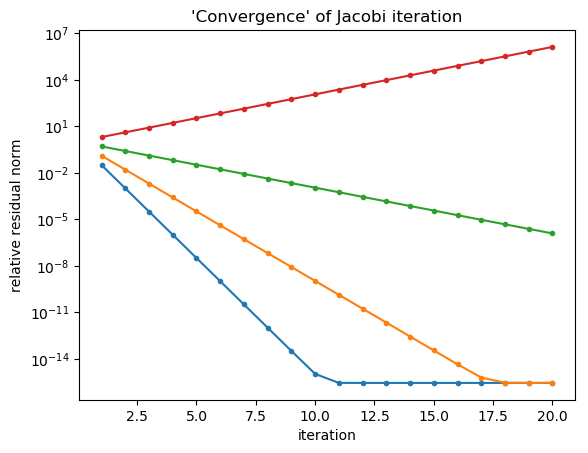

In [16]:
mu = sqrt(m);
for i = 1:4
    A = sprandn(m,m,0.001) + mu*speye(m);
    b = ones(m)
    x,normres = jacobi(A,b,20)
    semilogy(1:20,normres,".-");
    mu = mu/4;
end
xlabel("iteration"); ylabel("relative residual norm");
title("'Convergence' of Jacobi iteration");    

Although Jacobi, Gauss-Seidel, and friends (collectively called *stationary methods*) are historically important and still helpful in limited circumstances, they have mostly been overtaken by **Krylov subspace methods**. These are more robust over a wider range of problems. Moreover, they allow the incorporation of partial knowledge of the matrix or crude approximate solutions, and they can be used without even needing to know the matrix $A$! This last part sounds strange but is extremely important. 

## Matrix-free iterations

A matrix is the expression of a linear transformation on vectors. Krylov subspace methods require the matrix $A$ only in the form, "find $Av$ given any vector $v$." That is, any representation of the linear transformation is just as good as having the matrix. 

For instance, consider the PageRank algorithm that made Google the king of the internet search. PageRank represents the web as an undirected graph, or equivalently as a weighted adjacency matrix, where adjacency means a link in one page to another. This is an *enormous* graph that is *incredibly* sparse. You don't need to worry about representing the adjacency matrix $A$. Instead, you just need the capability to perform the mapping "given the probability of being on every page, follow links randomly to calculate the probabilities of visiting every page next." 

In differential equations, we don't need a matrix representation of a discretized differentiation operator, which could be a headache on 2D or 3D regions. You just need the operation (for example), "find the values of the derivative of an interpolant to these values." This matrix-free viewpoint is often easier to code and faster to compute. 